Use diabetes dataset. The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. Use k-nn to build the classification model. Evaluate your model performance. Use “gridsearchcv( )” to find the best value of ‘k’.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics as m

In [15]:
diabetes_df=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Diabetes.csv')

In [16]:
diabetes_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [17]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [18]:
feature_df=diabetes_df.values[:,:8]
target_df=diabetes_df.values[:,8]

In [19]:
feature_df.shape

(768, 8)

In [20]:
target_df.shape

(768,)

In [21]:
le=LabelEncoder()
target_df=le.fit_transform(target_df)

In [22]:
target_df

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [23]:
ss=StandardScaler()
feature_df=ss.fit_transform(feature_df)

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(feature_df,target_df,test_size=0.3,random_state=10)

In [39]:
neighbors=np.arange(2,21)
train_accuracy=np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

In [40]:
for i,k in enumerate(neighbors):
    iris_knn=KNeighborsClassifier(n_neighbors=k)
    iris_knn.fit(X_train,Y_train)

    train_accuracy[i]=iris_knn.score(X_train,Y_train)
    test_accuracy[i]=iris_knn.score(X_test,Y_test)

In [41]:
for i in range(len(train_accuracy)): 
    print(i,train_accuracy[i],'\t',test_accuracy[i])

0 0.839851024208566 	 0.6796536796536796
1 0.851024208566108 	 0.7012987012987013
2 0.8175046554934823 	 0.6753246753246753
3 0.8324022346368715 	 0.6666666666666666
4 0.7988826815642458 	 0.696969696969697
5 0.8100558659217877 	 0.6883116883116883
6 0.7877094972067039 	 0.683982683982684
7 0.7895716945996276 	 0.7012987012987013
8 0.7858472998137802 	 0.7012987012987013
9 0.7802607076350093 	 0.7012987012987013
10 0.7728119180633147 	 0.70995670995671
11 0.7839851024208566 	 0.7186147186147186
12 0.770949720670391 	 0.7186147186147186
13 0.7895716945996276 	 0.7056277056277056
14 0.7802607076350093 	 0.7056277056277056
15 0.7821229050279329 	 0.7272727272727273
16 0.7672253258845437 	 0.70995670995671
17 0.7802607076350093 	 0.7142857142857143
18 0.776536312849162 	 0.7056277056277056


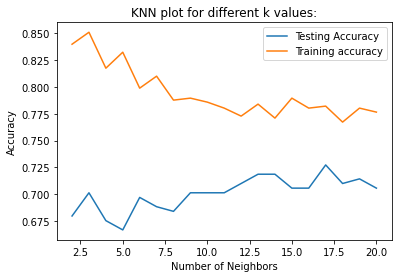

In [42]:
plt.title('KNN plot for different k values:')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [46]:
#using GridSearchCV to fing best value of k
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(2,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(feature_df,target_df)

print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.7669892199303965
{'n_neighbors': 17}


In [47]:
model=KNeighborsClassifier(n_neighbors=17)
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [48]:
y_pred=model.predict(X_test)

In [50]:
print(m.accuracy_score(Y_test,y_pred)*100)

72.72727272727273
